# The Sparks Foundation - Data Science & Business Analytics Internship
# AUTHOR : AMINA RAHMAN K

# TASK 2: Prediction using Unsupervised ML
From the given iris dataset, predict the optimum number of clusters and represent it visually.

# KMeans
When trying to analyze data, we might want to look for meaningful groups or clusters. Clustering is dividing data into groups based on similarity. And K-means is one of the most commonly used methods in clustering which is used when we don't have a labelled data(Unsupervised Learning).
- The K in ‘K-means’ stands for the number of clusters we’re trying to identify and Elbow Method is the most popular graphical method for finding this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/the-curious-analyst/The-Sparks-Foundation---Tasks/main/Task2_UnsupervisedML/Iris.csv')

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.2b9TA6i27eGjeDQE9qUaEgHaCx%26pid%3DApi&f=1'>

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

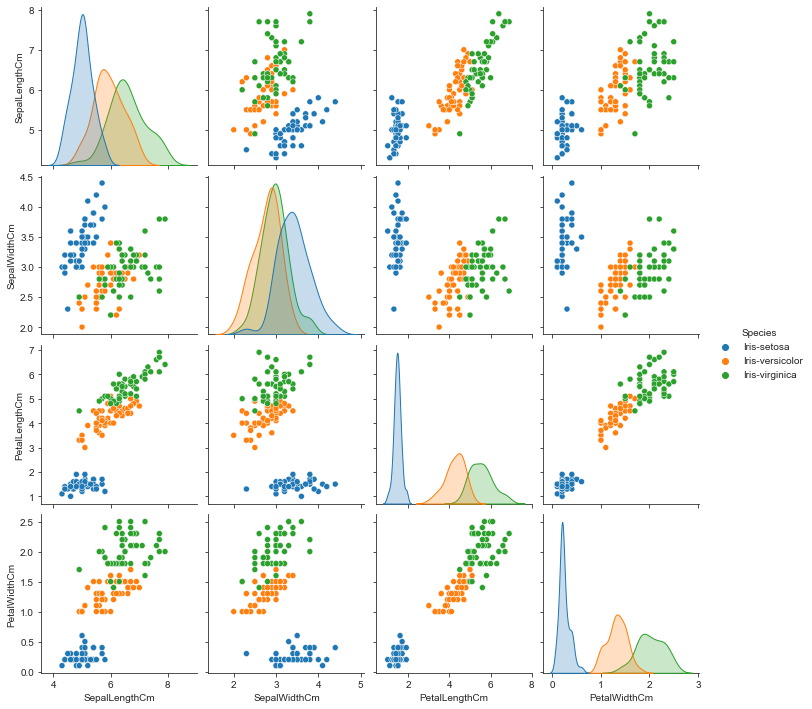

In [3]:
sns.pairplot(df.iloc[:,1:],hue = 'Species')
plt.show()

We can see that in all the scatter plots, there is a clustering pattern when we 'categorize' by species (especially Setosa), so it is safe to implement KMeans algorithm.

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

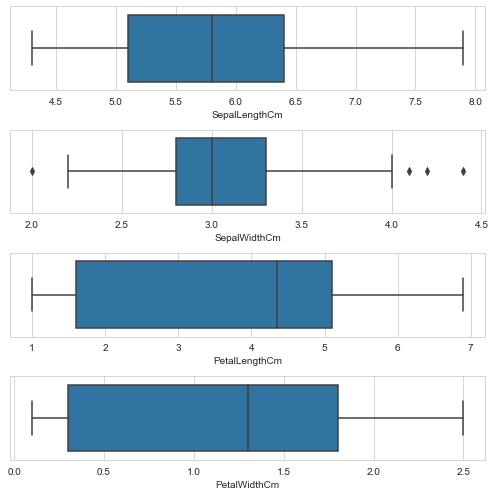

In [9]:
fig,axs = plt.subplots(4,figsize = (7,7))
plt1 = sns.boxplot(df['SepalLengthCm'],ax = axs[0])
plt2 = sns.boxplot(df['SepalWidthCm'],ax = axs[1])
plt3 = sns.boxplot(df['PetalLengthCm'],ax = axs[2])
plt4 = sns.boxplot(df['PetalWidthCm'],ax = axs[3])
plt.tight_layout()

We can see that there are some outliers in SepalWidthCm, this can affect our models performace since we are working with kmeans, a distance based clustering algorithm.Let's go ahead and winsorize them.

In [10]:
from scipy.stats.mstats import winsorize
winsorize(df.SepalWidthCm,limits=(1/150,3/150),inplace=True)

masked_array(data=[3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7,
                   3.4, 3. , 3. , 4. , 4. , 3.9, 3.5, 3.8, 3.8, 3.4, 3.7,
                   3.6, 3.3, 3.4, 3. , 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4. ,
                   4. , 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3, 3.2, 3.5,
                   3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8,
                   2.8, 3.3, 2.4, 2.9, 2.7, 2.2, 3. , 2.2, 2.9, 2.9, 3.1,
                   3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
                   3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3,
                   3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5,
                   2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6,
                   3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2,
                   2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
                   2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
                   3.2, 3.3, 3. , 2.5,

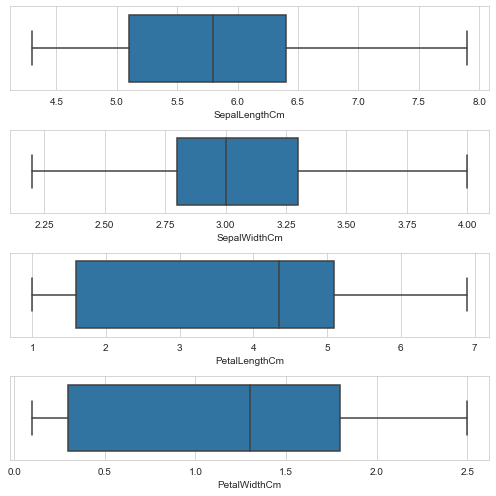

In [11]:
fig,axs = plt.subplots(4,figsize = (7,7))
plt1 = sns.boxplot(df['SepalLengthCm'],ax = axs[0])
plt2 = sns.boxplot(df['SepalWidthCm'],ax = axs[1])
plt3 = sns.boxplot(df['PetalLengthCm'],ax = axs[2])
plt4 = sns.boxplot(df['PetalWidthCm'],ax = axs[3])
plt.tight_layout()

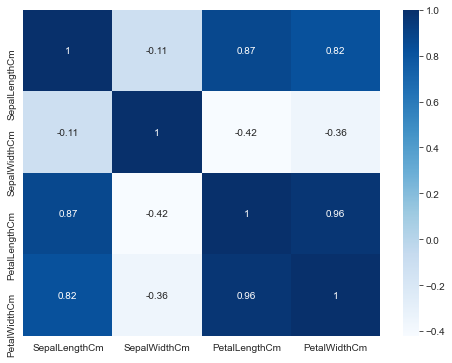

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,cmap='Blues')
plt.show()

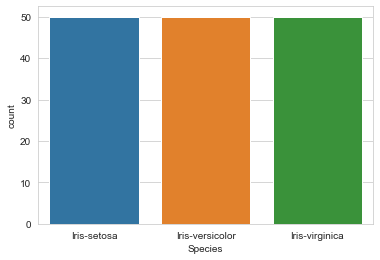

In [13]:
# lets check if we are dealing with a balanced dataset
sns.countplot(df.Species)
plt.show()

Since there are equal number of flowers in each species, we are dealing with a clean dataset.

## Lets replace all the String values in Species with numeric values

In [39]:
df['Species'].replace({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2},inplace = True)
df.sample(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
112,113,6.8,3.0,5.5,2.1,2
96,97,5.7,2.9,4.2,1.3,1
80,81,5.5,2.4,3.8,1.1,1
46,47,5.1,3.8,1.6,0.2,0
58,59,6.6,2.9,4.6,1.3,1
97,98,6.2,2.9,4.3,1.3,1


# Dividing the Dataset

Since we are using an unsupervised algorithm we only need the independent variables for the model building,We'll only use the y variableto check the accuracy of the odel

In [40]:
X = df.iloc[:,1:5]
y = df.Species

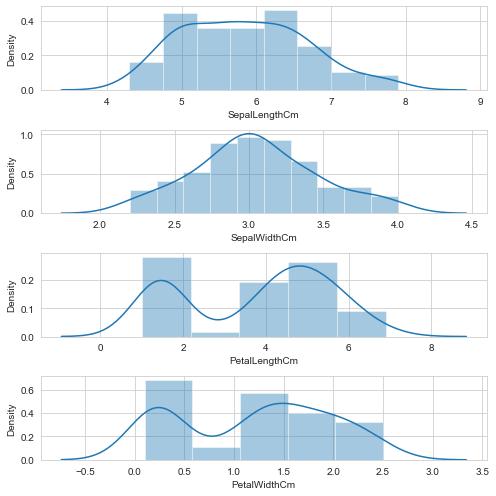

In [16]:
fig,axs = plt.subplots(4,figsize = (7,7))
plt1 = sns.distplot(df['SepalLengthCm'],ax = axs[0])
plt2 = sns.distplot(df['SepalWidthCm'],ax = axs[1])
plt3 = sns.distplot(df['PetalLengthCm'],ax = axs[2])
plt4 = sns.distplot(df['PetalWidthCm'],ax = axs[3])
plt.tight_layout()

# Model Creation

In [20]:
from sklearn.cluster import KMeans

In [22]:
kmeans_kwargs = {'init':'k-means++','n_init':10,'max_iter':300,'random_state':42}
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Inertia: It is the sum of squared distances of samples to their closest cluster center.

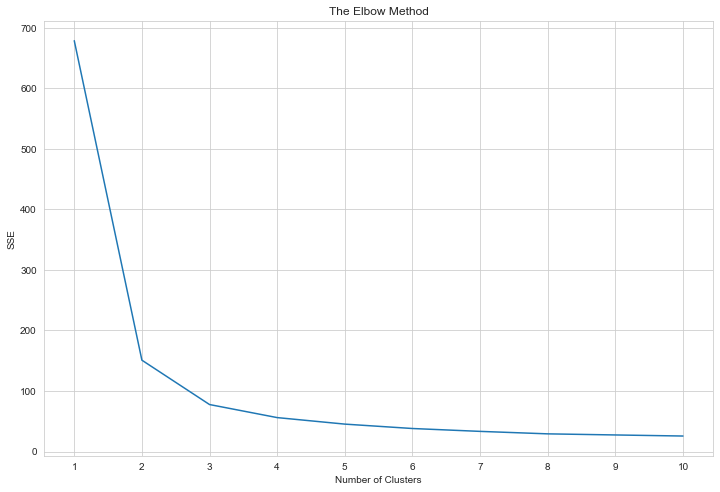

In [24]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. This is when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
> Here optimum cluster = 3

Which is correct!We have **3** species of Iris - Setosa,Versicolor,Virginica and the elbow method helped us find this optimum number correctly.

 Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [41]:
kmeans = KMeans(n_clusters=3,**kmeans_kwargs)
y_kmeans = kmeans.fit_predict(X)

Text(0.5, 1.0, 'Predicted')

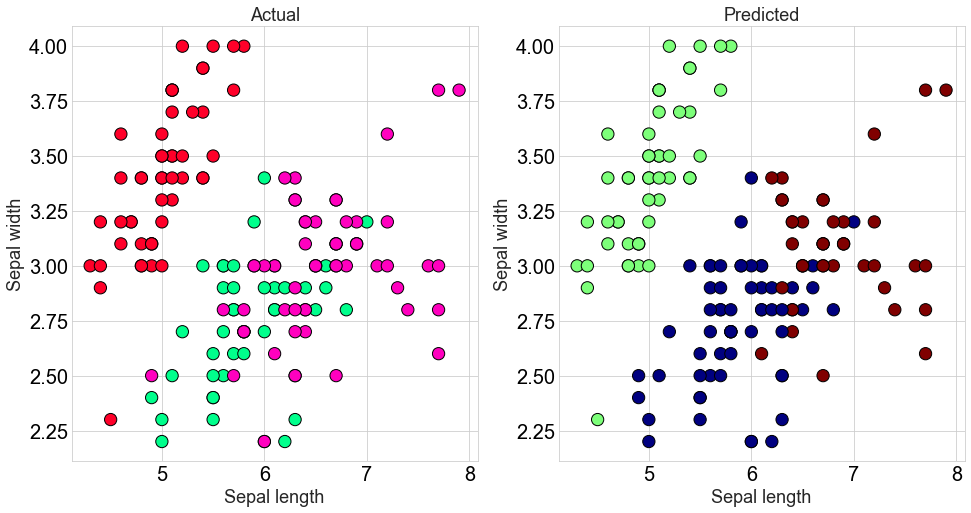

In [42]:
#this will tell us to which cluster does the data observations belong.
new_labels = kmeans.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

We can see that the model has performed well.It perfectly predicted the elements in Setosa cluster since it has a high intercluster distance from the others.

## Clustering Metrices

In [43]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, kmeans.labels_))

Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
